In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "E:\Chicago"

E:\Chicago


In [3]:
Victoria=pd.read_csv("Victoria.csv")

In [4]:
Victoria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7031 entries, 0 to 7030
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7031 non-null   int64  
 1   name                            7031 non-null   object 
 2   host_id                         7031 non-null   int64  
 3   host_name                       7031 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7031 non-null   object 
 6   latitude                        7031 non-null   float64
 7   longitude                       7031 non-null   float64
 8   room_type                       7031 non-null   object 
 9   price                           7031 non-null   int64  
 10  minimum_nights                  7031 non-null   int64  
 11  number_of_reviews               7031 non-null   int64  
 12  last_review                     61

In [5]:
Victoria['price'].head()

0    500
1     68
2    200
3    390
4    160
Name: price, dtype: int64

In [6]:
Victoria['price'].head(2)

0    500
1     68
Name: price, dtype: int64

In [7]:
Victoria[['price','minimum_nights','number_of_reviews']].head()

,price,minimum_nights,number_of_reviews
0,500,5,51
1,68,2,417
2,200,2,8
3,390,2,17
4,160,2,97


In [8]:
Victoria.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [9]:
Victoria.iloc[:,11].head()

0     51
1    417
2      8
3     17
4     97
Name: number_of_reviews, dtype: int64

In [10]:
Victoria.iloc[:,[5,7,8,9,11]].head()

,neighbourhood,longitude,room_type,price,number_of_reviews
0,Surf Coast,144.09309,Entire home/apt,500,51
1,Moyne,142.23136,Private room,68,417
2,Moyne,142.32739,Private room,200,8
3,Greater Geelong,144.68958,Entire home/apt,390,17
4,Southern Grampians,142.02087,Private room,160,97


In [11]:
Victoria.iloc[[5,7,8,9,11]]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5,2224983,Entire Seacroft Historic Ocean Front Guesthouse,10814850,Sam,NaN,Colac Otway,-38.69511,143.80196,Private room,2499,2,140,2021-04-23,1.26,26,240,0,NaN
7,4219456,Halcyon - 1940's vintage house,425511,Janice,NaN,Colac Otway,-38.74783,143.66418,Entire home/apt,145,2,61,2016-12-22,0.59,1,0,0,NaN
8,4244978,Beachcomber Retreat - Free WiFi,22029747,Merri,NaN,Colac Otway,-38.74733,143.66325,Entire home/apt,115,1,498,2023-01-07,4.88,1,0,15,NaN
9,4246704,"Proserpine Cottage — Farm Stay B&B, Photography.",22037923,Julie & Simon,NaN,Greater Geelong,-38.19079,144.27382,Entire home/apt,250,2,141,2023-03-05,1.59,1,326,8,NaN
11,4273754,Altair Yeah Yeah - walk to the beach,21832773,Guy,NaN,Greater Geelong,-38.26629,144.54432,Entire home/apt,426,2,138,2023-02-26,1.37,1,338,19,NaN


In [12]:
Victoria.price.describe

<bound method NDFrame.describe of 0        500
1         68
2        200
3        390
4        160
        ... 
7026    1316
7027     276
7028     800
7029     755
7030     330
Name: price, Length: 7031, dtype: int64>

In [13]:
Victoria.number_of_reviews.describe

<bound method NDFrame.describe of 0        51
1       417
2         8
3        17
4        97
       ... 
7026      0
7027      0
7028      0
7029      0
7030      0
Name: number_of_reviews, Length: 7031, dtype: int64>

In [14]:
print("skewness is:",Victoria.price.skew())
print("kurtosis is:",Victoria.price.kurt())

skewness is: 47.846763648922995
kurtosis is: 3202.6182798986542


In [15]:
print("skewness is:",Victoria.number_of_reviews.skew())
print("kurtosis is:",Victoria.number_of_reviews.kurt())

skewness is: 4.352670914860196
kurtosis is: 27.713702343390914


<Axes: ylabel='Frequency'>

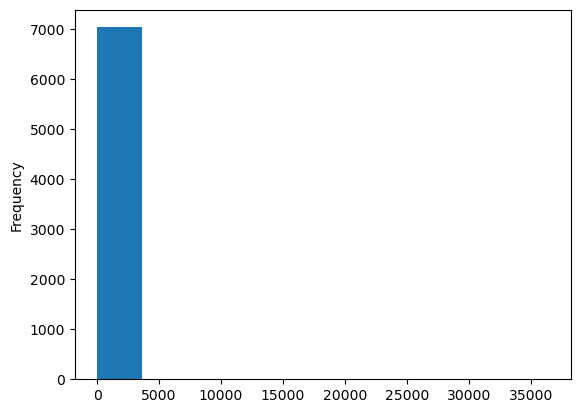

In [16]:
Victoria.price.plot(kind='hist')

<Axes: >

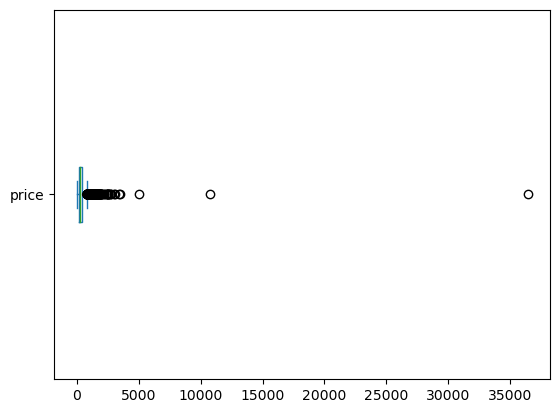

In [17]:
Victoria.price.plot(kind='box',vert=False)

<Axes: ylabel='Density'>

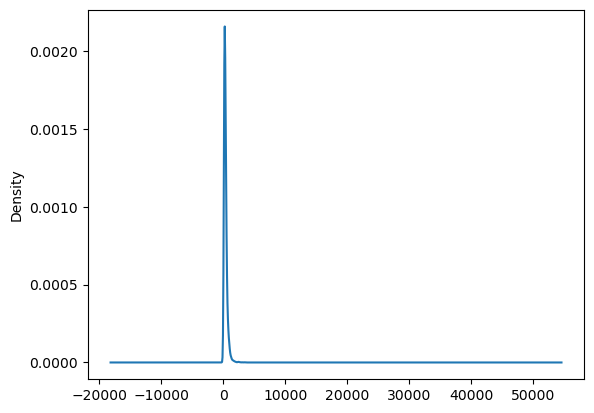

In [18]:
Victoria.price.plot(kind='density')

In [19]:
Victoria.room_type.value_counts()

Entire home/apt    6357
Private room        646
Hotel room           25
Shared room           3
Name: room_type, dtype: int64

<Axes: ylabel='room_type'>

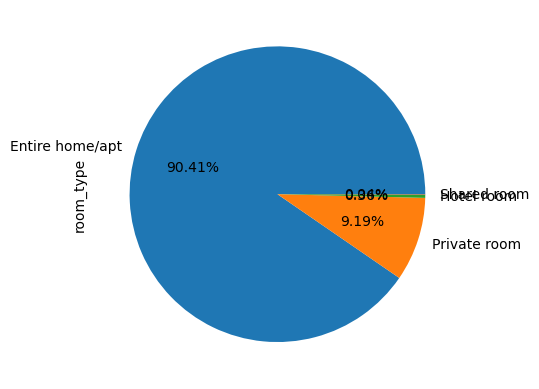

In [20]:
Victoria.room_type.value_counts().plot(kind='pie',autopct='%.2f%%')

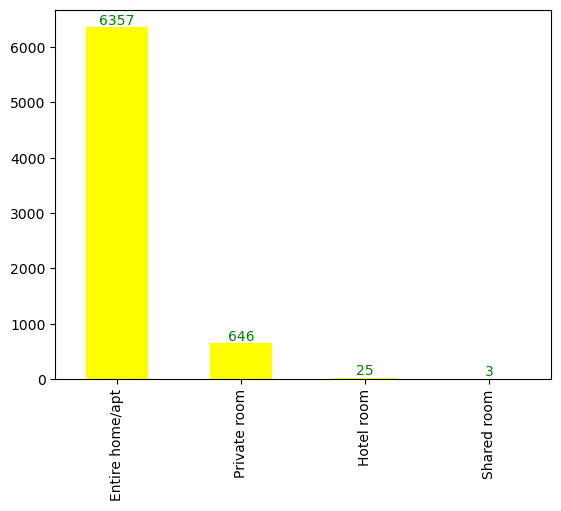

In [21]:
ax=Victoria.room_type.value_counts().plot(kind='bar',color='yellow')
for i in ax.containers:
    ax.bar_label(i,color='green')
    

In [22]:
pd.set_option("display.max_rows",9)
Victoria.neighbourhood.value_counts()

Surf Coast            2246
Greater Geelong       2141
Colac Otway           1002
Moyne                  499
Warrnambool            357
Corangamite            262
Queenscliffe           229
Glenelg                181
Southern Grampians     114
Name: neighbourhood, dtype: int64

In [23]:
Victoria.neighbourhood.value_counts().nlargest(6)

Surf Coast         2246
Greater Geelong    2141
Colac Otway        1002
Moyne               499
Warrnambool         357
Corangamite         262
Name: neighbourhood, dtype: int64

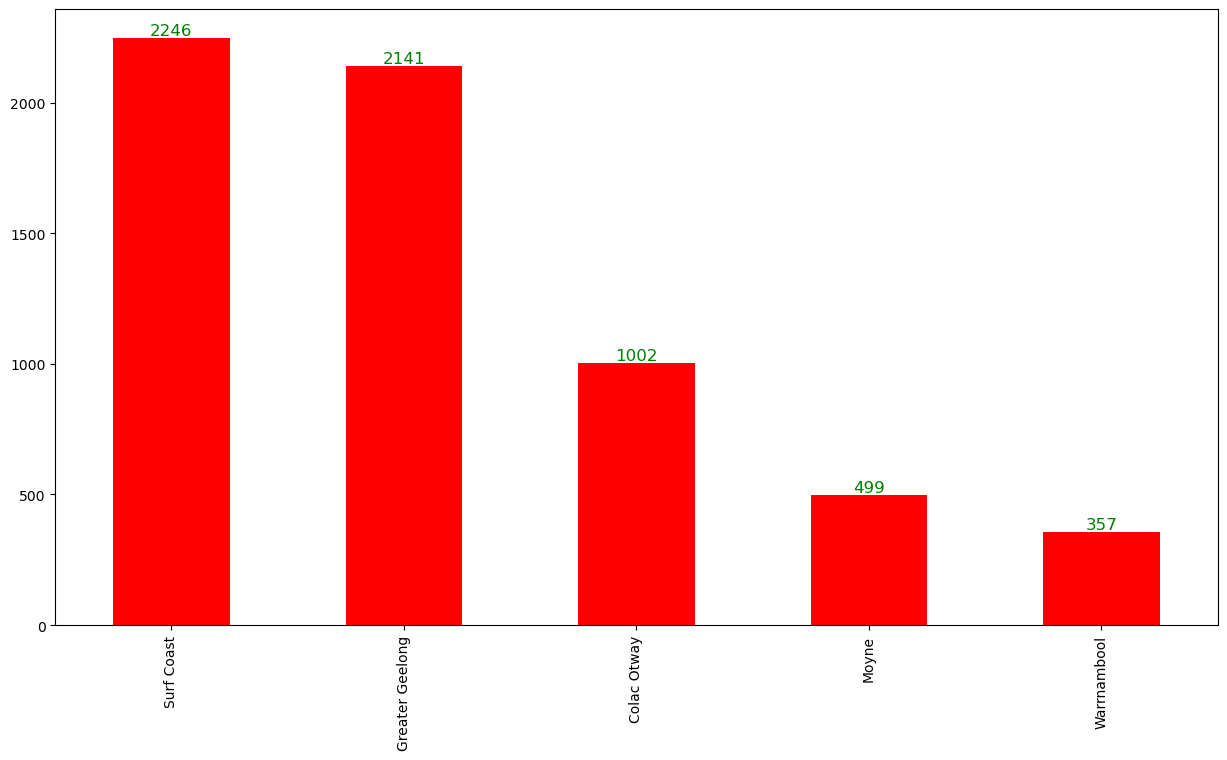

In [24]:
plt.figure(figsize=(15,8))
ax=Victoria.neighbourhood.value_counts().nlargest(5).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i,fontsize=12,color='green')


In [25]:
Victoria.number_of_reviews.groupby(
    Victoria.neighbourhood).sum().sort_values(
    ascending=False).nlargest(5)

neighbourhood
Greater Geelong    77938
Surf Coast         75052
Colac Otway        70508
Warrnambool        25354
Moyne              24174
Name: number_of_reviews, dtype: int64

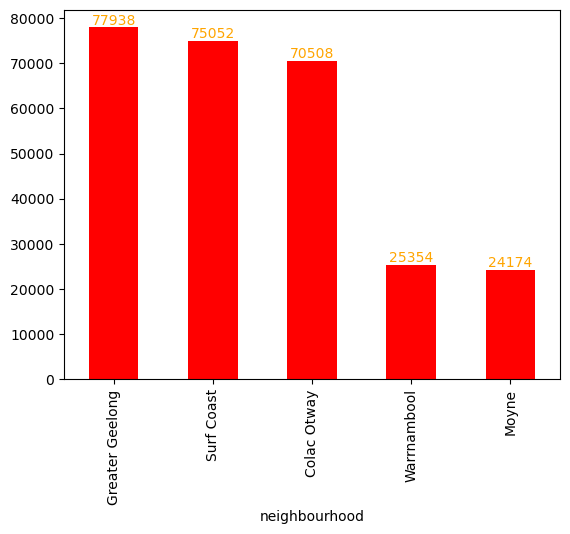

In [26]:
ax=Victoria.number_of_reviews.groupby(
    Victoria.neighbourhood).sum().sort_values(
    ascending=False).nlargest(5).plot(kind='bar',color='red')
for i in ax.containers:
    ax.bar_label(i,color='orange')

In [27]:
Victoria.price.groupby(
Victoria.neighbourhood).mean().sort_values(
ascending=False).nlargest(5)

neighbourhood
Surf Coast         460.847284
Queenscliffe       446.240175
Moyne              377.963928
Colac Otway        371.467066
Greater Geelong    356.834657
Name: price, dtype: float64

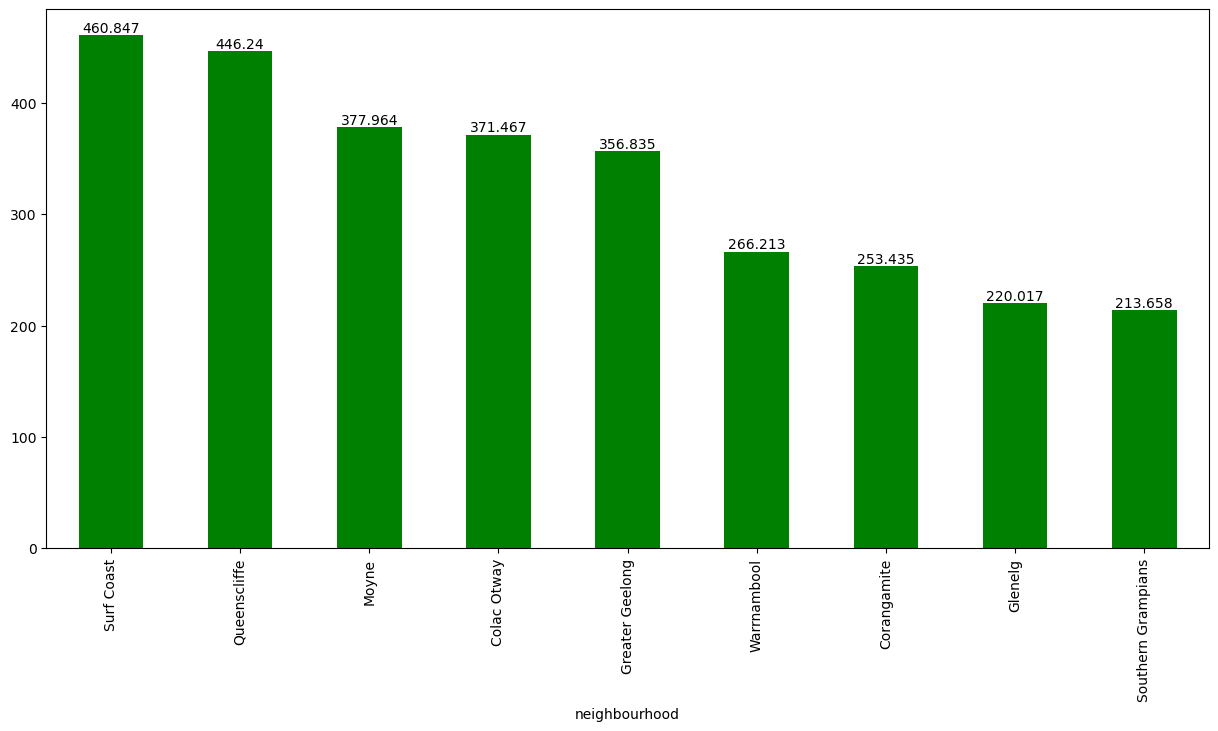

In [28]:
plt.figure(figsize=(15,7))
ax=Victoria.price.groupby(
    Victoria.neighbourhood).mean().sort_values(
    ascending=False).nlargest(9).plot(kind='bar',color='green')
for i in ax.containers:
    ax.bar_label(i)

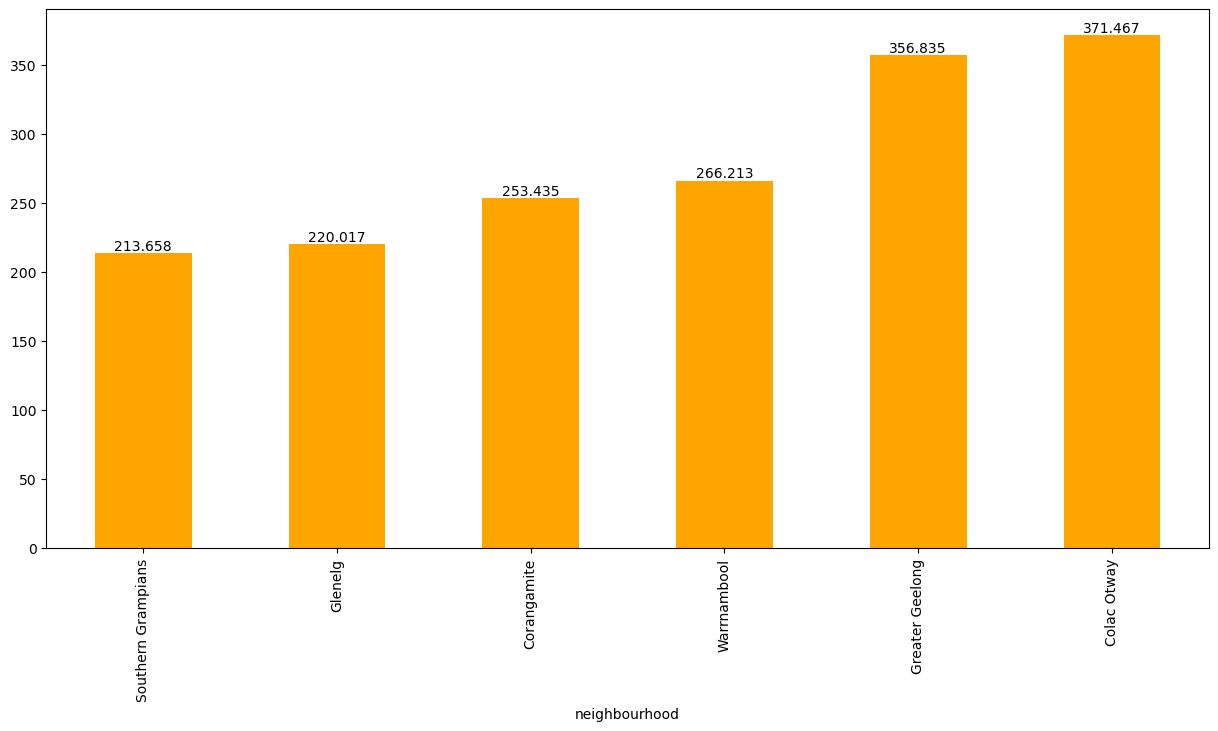

In [29]:
plt.figure(figsize=(15,7))
ax=Victoria.price.groupby(
Victoria.neighbourhood).mean().sort_values(
ascending=False).nsmallest(6).plot(kind='bar',color='orange')
for i in ax.containers:
    ax.bar_label(i)